<img src='https://www.digitalhrtech.com/wp-content/uploads/2019/10/High-employee-turnover-1280x720.jpg'>

# Le Turnover en entreprise : Qu’est-ce que c’est ?
***

Le turnover (rotation en français) est un phénomène de plus en plus présent dans la vie des entreprises en France (32% des employés français pensent fréquemment à changer d’emploi). Le turnover désigne dans une entreprise le renouvellement des effectifs, suite à des recrutements et des départs du personnel. Il constitue un indicateur précieux qui peut traduire assez facilement l’ambiance au travail au sein de l’entreprise. Les secteurs les plus touchés par ce phénomène sont le commerce (51%), suivis des professionnels de l’IT et de ceux de la téléprospection (41%).

### Quelles sont les facteurs qui favorisent un turnover ?
Plusieurs facteurs peuvent expliquer les causes d’un turnover élevé. En effet, les mauvaises conditions de travail, le climat social, le stress au travail… peuvent empêcher une entreprise de fidéliser ses salariés, qui de leur côté sont prêts à abandonner leur poste face à la moindre opportunité qui se présente. Une mauvaise gestion des ressources humaines (absence de promotion, perspective d’évolution pas claire, meilleure offre chez les concurrents…) sont autant d’éléments qui peuvent démotiver les employés et générer un turnover important au sein d’une entreprise.

<img src='https://s24787.pcdn.co/wp-content/uploads/2020/03/66-articlebanner-v2.gif'>

## Contexte 
***

L'entreprise de produits pharmaceutiques HumanForYou basée en Inde emploie environ 4000 personnes. Cependant, chaque année elle subit un turn-over d'environ 15% de ses employés nécessitant de retrouver des profils similaires sur le marché de l'emploi.
La direction trouve que ce niveau de turn-over n'est pas bon pour l'entreprise car :

- Les projets sur lesquels étaient les employés quittant la société prennent du retard ce qui nuit à la réputation de l'entreprise auprès de ses clients et partenaires.

- Un service de ressources humaines de taille conséquente doit être conservé car il faut avoir les moyens de trouver les nouvelles recrues.

- Du temps est perdu à l'arrivée des nouveaux employés car ils doivent très souvent être formés et ont besoin de temps pour devenir pleinement opérationnels dans leur nouvel environnement.

Ainsi, le but de notre étude est de déterminer les facteurs ayant le plus d'influence sur ce taux de turn-over et de proposer des modèles afin d'avoir des pistes d'amélioration pour donner à leurs employés l'envie de rester.

## Objectif
***

Durant cette démarche, nous allons étudier et analyser les données des employés et de l'entreprise, modéliser les différents comportemet à traves des modèles d'apprentissage et d'en tirer des conclusions.

## OSEMN pipeline
***

Durant ce porjet, nous allons nous appuyer sur la pipeline *OSEMN* ( "awesome" ) :
- O — Obtaining our data
- S — Scrubbing / Cleaning our data
- E — Exploring / Visualizing our data will allow us to find patterns and trends
- M — Modeling our data will give us our predictive power as a wizard
- N — Interpreting our data

# Part 1 : Obtaining the data
***

In [1]:
#preparing the environment

# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os
import pandas as pd
import seaborn as sns

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [2]:
#Read the analytics csv file and store our dataset into dataframes
df_general = pd.read_csv('Dataset\general_data.csv')
df_manager_survey = pd.read_csv('Dataset\manager_survey_data.csv')
df_employee_survey = pd.read_csv('Dataset\employee_survey_data.csv')
df_in_time = pd.read_csv('Dataset\in_time.csv')
df_out_time = pd.read_csv('Dataset\out_time.csv')

# Part 2: Scrubbing the data
***

Dans cette partie, nous allons exmainer les différents datasets qu'on a, en visualiser les données et déterminer les données qui peuvent nous intéresser pour cette étude. Ainsi, nous allons dans une première étape découvrir leurs contenus, éliminer les données qu'on estime inutiles et traiter celles qu'on va utiliser dans les porchaines étapes de notre analyse.

### Dataset *general*
Le dataset general comporte tous les données confiés par le service des ressources humaines concernant les employés de l'entreprise.

In [3]:
df_general.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


Pour mieux visualiser ces données, nous créeons un tableau récapitulatif. Pour cela, nous manipulons le dataset en utilisant la bibliothèque Pandas, notamment pour voir les différentes valuers uniques d'une colonne et le type de ces valeurs.

| Varibles | Description | Utilité | Type de valuer | 
| --- | --- | --- | --- |
| Age | L'âge de l'employé en 2015 | Oui | numérique |
|  Attrition  |L'objet de notre étude, est-ce que l'employé a quitté l'entreprise durant l'année 2016 ? | Variable expliquée (*Outcome*) | booléen : 'Yes', 'No'|
| BusinessTravel | A quel fréquence l'employé a été amené à se déplacer dans le cadre de son travail en 2015 ?  | Non | Non-Travel = jamais, Travel_Rarely= rarement, Travel_Frequently = fréquemment |
| Education  | Niveau d'étude | Non | 1=Avant College (équivalent niveau Bac), 2=College (équivalent Bac+2), 3=Bachelor (Bac+3), 4=Master (Bac+5) et 5=PhD (Thèse de doctorat). |
| EducationField | Domaine d'étude, matière principale | Non | String : 'Life Sciences', 'Other', 'Medical', 'Marketing', 'Technical Degree', 'Human Resources' |
| EmployeeCount | booléen à 1 si l'employé était compté dans les effectifs en 2015  | Non  | booléen (tous==1)|
| EmployeeID | l'identifiant d'un employé | Non | Numérique |
| Gender | Sexe de l'employé | Oui | String : Male/Female |
|JobLevel | Niveau hiérarchique dans l'entreprise | Oui | Int: [1..5] |
| JobRole | Métier dans l'entreprise | Oui | String : 'Healthcare Representative', 'Research Scientist','Sales Executive', 'Human Resources', 'Research Director','Laboratory Technician', 'Manufacturing Director','Sales Representative', 'Manager'  |
| MaritalStatus | Statut marital du salarié (Célibataire, Marié ou Divorcé)  | Oui |String: 'Married', 'Single', 'Divorced' |
| MonthlyIncome | Salaire brut en roupies par mois | Oui | int |
| NumCompaniesWorked | Nombre d'entreprises pour lequel le salarié a travaillé avant de rejoindre HumanForYou. | Oui | float|
| Over18 | Est-ce que le salarié a plus de 18 ans ou non ?  | Non | Over18 |
| PercentSalaryHike | % d'augmentation du salaire en 2015. | Oui | int |
| StandardHours | Nombre d'heures par jour dans le contrat du salarié.  | Non | int (tous==8) |
| StockOptionLevel | Niveau d'investissement en actions de l'entreprise par le salarié. | Oui | int [0..3] |
| TotalWorkingYears | Nombre d'années d'expérience en entreprise du salarié pour le même type de poste.  | Oui | float |
| TrainingTimesLastYear | Nombre de jours de formation en 2015 | Oui | int |
| YearsAtCompany | Ancienneté dans l'entreprise | Oui | int |
| YearsSinceLastPromotion | Nombre d'années depuis la dernière augmentation individuelle  | Oui | int |
| YearsWithCurrManager | Nombre d'années de collaboration sous la responsabilité du manager actuel de l'employé.  | Oui | int |

In [4]:
#Delete useless columns
df_general = df_general.drop(columns=['EmployeeCount','Gender','MaritalStatus','EmployeeID','Over18','StandardHours',
                                      'BusinessTravel','EducationField','Education'])
display(df_general.head())

,Age,Attrition,Department,DistanceFromHome,JobLevel,JobRole,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Sales,6,1,Healthcare Representative,131160,1.0,11,0,1.0,6,1,0,0
1,31,Yes,Research & Development,10,1,Research Scientist,41890,0.0,23,1,6.0,3,5,1,4
2,32,No,Research & Development,17,4,Sales Executive,193280,1.0,15,3,5.0,2,5,0,3
3,38,No,Research & Development,2,3,Human Resources,83210,3.0,11,3,13.0,5,8,7,5
4,32,No,Research & Development,10,1,Sales Executive,23420,4.0,12,2,9.0,2,6,0,4


In [5]:
df_general.isnull().any()

Age                        False
Attrition                  False
Department                 False
DistanceFromHome           False
JobLevel                   False
JobRole                    False
MonthlyIncome              False
NumCompaniesWorked          True
PercentSalaryHike          False
StockOptionLevel           False
TotalWorkingYears           True
TrainingTimesLastYear      False
YearsAtCompany             False
YearsSinceLastPromotion    False
YearsWithCurrManager       False
dtype: bool

---------
Il est important de convertir la colonne **Attrition** en valeurs numériques

---------

In [6]:
#replacing to numeric values

df_general["Attrition"].replace({"Yes":1,"No":0}, inplace=True)

df_general.head()

,Age,Attrition,Department,DistanceFromHome,JobLevel,JobRole,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,Sales,6,1,Healthcare Representative,131160,1.0,11,0,1.0,6,1,0,0
1,31,1,Research & Development,10,1,Research Scientist,41890,0.0,23,1,6.0,3,5,1,4
2,32,0,Research & Development,17,4,Sales Executive,193280,1.0,15,3,5.0,2,5,0,3
3,38,0,Research & Development,2,3,Human Resources,83210,3.0,11,3,13.0,5,8,7,5
4,32,0,Research & Development,10,1,Sales Executive,23420,4.0,12,2,9.0,2,6,0,4


In [7]:
null_rows_general = df_general[df_general.isnull().any(axis=1)]
null_rows_general.shape

(28, 15)

---
Après avoir transformé toutes les valeurs de notre Dataframe en valeurs numériques, nous allons procéder au remplacement des valeurs nulles par la valeur de la moyenne.

---

In [8]:
#remplacing null vlaues with median value
df_general = df_general.fillna(df_general.mean())
df_general.isnull().any()

Age                        False
Attrition                  False
Department                 False
DistanceFromHome           False
JobLevel                   False
JobRole                    False
MonthlyIncome              False
NumCompaniesWorked         False
PercentSalaryHike          False
StockOptionLevel           False
TotalWorkingYears          False
TrainingTimesLastYear      False
YearsAtCompany             False
YearsSinceLastPromotion    False
YearsWithCurrManager       False
dtype: bool

### Dataset Manager Survey
Ce fichier contient la dernière évaluation de chaque employé faite pas son manager en février 2015.

In [9]:
df_manager_survey.head()

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3


Pour mieux visualiser ces données, nous créeons un tableau récapitulatif. Pour cela, nous manipulons le dataset en utilisant la bibliothèque Pandas, notamment pour voir les différentes valuers uniques d'une colonne et le type de ces valeurs.

| Varibles | Description | Utilité | Type de valuer | 
| --- | --- | --- | --- |
| EmployeeID| L'identifiant de l'employé | Non | int |
| JobInvolvement |  Une évaluation de son implication dans son travail notée 1 ('Faible'), 2 ("Moyenne"), 3 ("Importante") ou 4 ("Très importante") | Oui | int |
| PerformanceRating | Une évaluation de son niveau de performance annuel pour l'entreprise notée 1 ("Faible"), 2 ("Bon"), 3 ("Excellent") ou 4 ("Au delà des attentes") | Oui | int |

In [10]:
df_manager_survey = df_manager_survey.drop(columns=['EmployeeID'])
df_manager_survey.head()

,JobInvolvement,PerformanceRating
0,3,3
1,2,4
2,3,3
3,2,3
4,3,3


In [11]:
df_manager_survey.isnull().any()

JobInvolvement       False
PerformanceRating    False
dtype: bool

On remarque que ce dataset ne contient pas de valeurs nulles.

Aussi, il est plus judicieux de créer une seule valeur à partir de ces deux valeurs.

In [12]:
evaluation = (df_manager_survey['JobInvolvement']+df_manager_survey['PerformanceRating'])/8
df_evaluation = pd.DataFrame({'evaluation':evaluation})
df_evaluation

,evaluation
0,0.750
1,0.750
2,0.750
3,0.625
4,0.750
...,...
4405,0.750
4406,0.625
4407,0.875
4408,0.625


### Dataset Employee Survey
Ce fichier provient d'une enquête soumise aux employés en juin 2015 par le service RH pour avoir un retour concernant leur qualité de vie au travail.

Une organisation avait été mise en place pour que chacun puisse répondre à ce questionnaire sur son lieu de travail en concertation avec les managers mais il n'y avait pas d'obligation.

In [13]:
df_employee_survey.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


Pour mieux visualiser ces données, nous créeons un tableau récapitulatif. Pour cela, nous manipulons le dataset en utilisant la bibliothèque Pandas, notamment pour voir les différentes valuers uniques d'une colonne et le type de ces valeurs.

| Varibles | Description | Utilité | Type de valuer | 
| --- | --- | --- | --- |
| EmployeeID | L'identifiant de l'employé | Non | int |
| EnvironmentSatisfaction| l'environnement de travail, noté 1 ("Faible"), 2 ("Moyen"), 3 ("Élevé") ou 4 ("Très élevé") | Oui | int |
| JobSatisfaction | son travail, noté de 1 à 4 comme précédemment | Oui | int |
| WorkLifeBalance | son équilibre entre vie professionnelle et vie privée, noté 1 ("Mauvais"), 2 ("Satisfaisant"), 3 ("Très satisfaisant") ou 4 ("Excellent") | Oui | int |

***Lorsque un employé n'a pas répondu à une question, le texte "NA" apparaît à la place de la note.***

In [14]:
df_employee_survey = df_employee_survey.drop(columns=['EmployeeID'])
df_employee_survey.head()

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,3.0,4.0,2.0
1,3.0,2.0,4.0
2,2.0,2.0,1.0
3,4.0,4.0,3.0
4,4.0,1.0,3.0


In [15]:
df_employee_survey.isnull().any()

EnvironmentSatisfaction    True
JobSatisfaction            True
WorkLifeBalance            True
dtype: bool

---
On remarque que 83 colonnes contiennent des valeurs nulles. Notre approche pour remplacer ces valeurs la suivante : pour chaque ligne contenant une valeur manquante, on remplace celle-ce par la valeur moyenne des autres valeurs sur la même ligne.

---

In [16]:
df_employee_survey = df_employee_survey.T.fillna(df_employee_survey.mean(axis=1)).T
df_employee_survey.isnull().any()

EnvironmentSatisfaction    False
JobSatisfaction            False
WorkLifeBalance            False
dtype: bool

---
Il est plus judicieux de créer une seule valeure à partir de ce dataset.

---

In [17]:
satisfaction = (df_employee_survey['WorkLifeBalance']+df_employee_survey['EnvironmentSatisfaction']+
                df_employee_survey['JobSatisfaction'])/12
df_satisfaction = pd.DataFrame({'satisfaction':satisfaction})
df_satisfaction

,satisfaction
0,0.750000
1,0.750000
2,0.416667
3,0.916667
4,0.666667
...,...
4405,0.666667
4406,0.916667
4407,0.583333
4408,0.666667


### Dataset Time in Time out
Des badgeuses sont installées et utilisées dans l'entreprise depuis quelques années. Il a été jugé opportun par la direction de vous transmettre les horaires d'entrée et de sortie des employés sur une période de l'année choisie représentative d'une activité moyenne pour l'ensemble des services.

Nous trouvons donc 2 fichiers traçants les horaires d'arrivée à leur poste et de départ de leur poste de l'ensemble des employés par date sur une période allant du 1er janvier au 31 décembre 2015.

In [18]:
display (df_in_time.head(), df_out_time.head())

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,...,NaN,2015-12-21 09:55:29,2015-12-22 10:04:06,2015-12-23 10:14:27,2015-12-24 10:11:35,NaN,2015-12-28 10:13:41,2015-12-29 10:03:36,2015-12-30 09:54:12,2015-12-31 10:12:44
1,2,NaN,2015-01-02 10:15:44,2015-01-05 10:21:05,NaN,2015-01-07 09:45:17,2015-01-08 10:09:04,2015-01-09 09:43:26,2015-01-12 10:00:07,2015-01-13 10:43:29,...,2015-12-18 10:37:17,2015-12-21 09:49:02,2015-12-22 10:33:51,2015-12-23 10:12:10,NaN,NaN,2015-12-28 09:31:45,2015-12-29 09:55:49,2015-12-30 10:32:25,2015-12-31 09:27:20
2,3,NaN,2015-01-02 10:17:41,2015-01-05 09:50:50,2015-01-06 10:14:13,2015-01-07 09:47:27,2015-01-08 10:03:40,2015-01-09 10:05:49,2015-01-12 10:03:47,2015-01-13 10:21:26,...,2015-12-18 10:15:14,2015-12-21 10:10:28,2015-12-22 09:44:44,2015-12-23 10:15:54,2015-12-24 10:07:26,NaN,2015-12-28 09:42:05,2015-12-29 09:43:36,2015-12-30 09:34:05,2015-12-31 10:28:39
3,4,NaN,2015-01-02 10:05:06,2015-01-05 09:56:32,2015-01-06 10:11:07,2015-01-07 09:37:30,2015-01-08 10:02:08,2015-01-09 10:08:12,2015-01-12 10:13:42,2015-01-13 09:53:22,...,2015-12-18 10:17:38,2015-12-21 09:58:21,2015-12-22 10:04:25,2015-12-23 10:11:46,2015-12-24 09:43:15,NaN,2015-12-28 09:52:44,2015-12-29 09:33:16,2015-12-30 10:18:12,2015-12-31 10:01:15
4,5,NaN,2015-01-02 10:28:17,2015-01-05 09:49:58,2015-01-06 09:45:28,2015-01-07 09:49:37,2015-01-08 10:19:44,2015-01-09 10:00:50,2015-01-12 10:29:27,2015-01-13 09:59:32,...,2015-12-18 09:58:35,2015-12-21 10:03:41,2015-12-22 10:10:30,2015-12-23 10:13:36,2015-12-24 09:44:24,NaN,2015-12-28 10:05:15,2015-12-29 10:30:53,2015-12-30 09:18:21,2015-12-31 09:41:09


,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,...,NaN,2015-12-21 17:15:50,2015-12-22 17:27:51,2015-12-23 16:44:44,2015-12-24 17:47:22,NaN,2015-12-28 18:00:07,2015-12-29 17:22:30,2015-12-30 17:40:56,2015-12-31 17:17:33
1,2,NaN,2015-01-02 18:22:17,2015-01-05 17:48:22,NaN,2015-01-07 17:09:06,2015-01-08 17:34:04,2015-01-09 16:52:29,2015-01-12 17:36:48,2015-01-13 18:00:13,...,2015-12-18 18:31:28,2015-12-21 17:34:16,2015-12-22 18:16:35,2015-12-23 17:38:18,NaN,NaN,2015-12-28 17:08:38,2015-12-29 17:54:46,2015-12-30 18:31:35,2015-12-31 17:40:58
2,3,NaN,2015-01-02 16:59:14,2015-01-05 17:06:46,2015-01-06 16:38:32,2015-01-07 16:33:21,2015-01-08 17:24:22,2015-01-09 16:57:30,2015-01-12 17:28:54,2015-01-13 17:21:25,...,2015-12-18 17:02:23,2015-12-21 17:20:17,2015-12-22 16:32:50,2015-12-23 16:59:43,2015-12-24 16:58:25,NaN,2015-12-28 16:43:31,2015-12-29 17:09:56,2015-12-30 17:06:25,2015-12-31 17:15:50
3,4,NaN,2015-01-02 17:25:24,2015-01-05 17:14:03,2015-01-06 17:07:42,2015-01-07 16:32:40,2015-01-08 16:53:11,2015-01-09 17:19:47,2015-01-12 17:13:37,2015-01-13 17:11:45,...,2015-12-18 17:55:23,2015-12-21 16:49:09,2015-12-22 17:24:00,2015-12-23 17:36:35,2015-12-24 16:48:21,NaN,2015-12-28 17:19:34,2015-12-29 16:58:16,2015-12-30 17:40:11,2015-12-31 17:09:14
4,5,NaN,2015-01-02 18:31:37,2015-01-05 17:49:15,2015-01-06 17:26:25,2015-01-07 17:37:59,2015-01-08 17:59:28,2015-01-09 17:44:08,2015-01-12 18:51:21,2015-01-13 18:14:58,...,2015-12-18 17:52:48,2015-12-21 17:43:35,2015-12-22 18:07:57,2015-12-23 18:00:49,2015-12-24 17:59:22,NaN,2015-12-28 17:44:59,2015-12-29 18:47:00,2015-12-30 17:15:33,2015-12-31 17:42:14


---
En utilisant ces deux dataset, on va calculer la moyenne mensuelle des heures de travail pour chaques employée.

---

In [19]:
df_out_time = df_out_time.fillna(0)
df_in_time = df_in_time.fillna(0)

In [20]:
df_in_time = pd.to_datetime(df_in_time.stack()).unstack()
df_out_time = pd.to_datetime(df_out_time.stack()).unstack()
diff = df_out_time - df_in_time
diff

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,0 days,0 days,0 days 07:12:30,0 days 07:11:23,0 days 07:24:39,0 days 07:00:24,0 days 07:17:23,0 days 07:29:04,0 days 07:15:46,0 days 07:49:52,...,0 days 00:00:00,0 days 07:20:21,0 days 07:23:45,0 days 06:30:17,0 days 07:35:47,0 days,0 days 07:46:26,0 days 07:18:54,0 days 07:46:44,0 days 07:04:49
1,0 days,0 days,0 days 08:06:33,0 days 07:27:17,0 days 00:00:00,0 days 07:23:49,0 days 07:25:00,0 days 07:09:03,0 days 07:36:41,0 days 07:16:44,...,0 days 07:54:11,0 days 07:45:14,0 days 07:42:44,0 days 07:26:08,0 days 00:00:00,0 days,0 days 07:36:53,0 days 07:58:57,0 days 07:59:10,0 days 08:13:38
2,0 days,0 days,0 days 06:41:33,0 days 07:15:56,0 days 06:24:19,0 days 06:45:54,0 days 07:20:42,0 days 06:51:41,0 days 07:25:07,0 days 06:59:59,...,0 days 06:47:09,0 days 07:09:49,0 days 06:48:06,0 days 06:43:49,0 days 06:50:59,0 days,0 days 07:01:26,0 days 07:26:20,0 days 07:32:20,0 days 06:47:11
3,0 days,0 days,0 days 07:20:18,0 days 07:17:31,0 days 06:56:35,0 days 06:55:10,0 days 06:51:03,0 days 07:11:35,0 days 06:59:55,0 days 07:18:23,...,0 days 07:37:45,0 days 06:50:48,0 days 07:19:35,0 days 07:24:49,0 days 07:05:06,0 days,0 days 07:26:50,0 days 07:25:00,0 days 07:21:59,0 days 07:07:59
4,0 days,0 days,0 days 08:03:20,0 days 07:59:17,0 days 07:40:57,0 days 07:48:22,0 days 07:39:44,0 days 07:43:18,0 days 08:21:54,0 days 08:15:26,...,0 days 07:54:13,0 days 07:39:54,0 days 07:57:27,0 days 07:47:13,0 days 08:14:58,0 days,0 days 07:39:44,0 days 08:16:07,0 days 07:57:12,0 days 08:01:05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,0 days,0 days,0 days 08:07:05,0 days 08:50:27,0 days 08:23:58,0 days 08:50:42,0 days 08:13:25,0 days 08:16:51,0 days 08:21:38,0 days 08:45:33,...,0 days 08:04:59,0 days 08:09:41,0 days 08:17:33,0 days 08:36:16,0 days 08:35:49,0 days,0 days 08:28:56,0 days 09:04:29,0 days 08:56:37,0 days 08:30:29
4406,0 days,0 days,0 days 06:15:20,0 days 00:00:00,0 days 05:23:37,0 days 05:43:40,0 days 06:11:36,0 days 05:42:52,0 days 06:03:10,0 days 06:17:32,...,0 days 05:55:30,0 days 05:49:50,0 days 05:55:29,0 days 06:06:38,0 days 05:59:34,0 days,0 days 05:40:11,0 days 06:33:30,0 days 05:42:08,0 days 06:08:51
4407,0 days,0 days,0 days 07:16:34,0 days 07:35:07,0 days 07:38:29,0 days 07:59:10,0 days 07:17:47,0 days 07:01:54,0 days 07:46:33,0 days 07:28:42,...,0 days 07:47:08,0 days 07:51:58,0 days 07:45:13,0 days 07:45:08,0 days 07:24:07,0 days,0 days 07:44:04,0 days 00:00:00,0 days 07:45:38,0 days 08:05:25
4408,0 days,0 days,0 days 09:31:32,0 days 09:35:13,0 days 09:47:18,0 days 09:23:28,0 days 09:12:16,0 days 00:00:00,0 days 09:17:39,0 days 09:35:59,...,0 days 09:58:11,0 days 09:20:27,0 days 09:22:21,0 days 09:14:30,0 days 09:41:52,0 days,0 days 10:03:11,0 days 09:00:44,0 days 09:21:38,0 days 09:36:58


In [21]:
times = diff.sum(axis=1)
average_hours = times.dt.total_seconds() / (3600*12)
df_monthly_hours = pd.DataFrame({'monthlyHours':average_hours})
df_monthly_hours.head()

,monthlyHours
0,142.557245
1,151.806389
2,141.433681
3,140.876204
4,163.459398


<img src='https://lh3.googleusercontent.com/proxy/pl_J14FevzT3ivaFMJnJAAPfeK3_shTf8TwTPctvNNQgS0ncT5KOxLWlY95M_YMnAtMCBfhZHTSj-7JOTNSrRhkRGhewsL7_-i1kLNw39IVImkG-S18LvNA-oUCU'>

### Dataset final

Après avoir traité chaque dataset, on crée notre dataset final.

In [22]:
df_final = pd.concat([df_general, df_evaluation,df_satisfaction,df_monthly_hours], axis=1)
df_small = df_final
df_final

,Age,Attrition,Department,DistanceFromHome,JobLevel,JobRole,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,evaluation,satisfaction,monthlyHours
0,51,0,Sales,6,1,Healthcare Representative,131160,1.0,11,0,1.000000,6,1,0,0,0.750,0.750000,142.557245
1,31,1,Research & Development,10,1,Research Scientist,41890,0.0,23,1,6.000000,3,5,1,4,0.750,0.750000,151.806389
2,32,0,Research & Development,17,4,Sales Executive,193280,1.0,15,3,5.000000,2,5,0,3,0.750,0.416667,141.433681
3,38,0,Research & Development,2,3,Human Resources,83210,3.0,11,3,13.000000,5,8,7,5,0.625,0.916667,140.876204
4,32,0,Research & Development,10,1,Sales Executive,23420,4.0,12,2,9.000000,2,6,0,4,0.750,0.666667,163.459398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,0,Research & Development,5,1,Research Scientist,60290,3.0,17,1,10.000000,5,3,0,2,0.750,0.666667,172.576111
4406,29,0,Research & Development,2,1,Laboratory Technician,26790,2.0,15,0,10.000000,2,3,0,2,0.625,0.916667,122.366829
4407,25,0,Research & Development,25,2,Sales Executive,37020,0.0,20,0,5.000000,4,4,1,2,0.875,0.583333,148.352662
4408,42,0,Sales,18,1,Laboratory Technician,23980,0.0,14,1,10.000000,2,9,7,8,0.625,0.666667,190.642940


# Part 3: Exploring the Data
*** 
<img src='https://media1.giphy.com/media/133l9lMseIxhfy/giphy.gif'>

## Statistical overview

---

Notre dataset contient : 
- 4410 données d'employés et 21 features
- l'entreprise subit un turn-over de 16%

In [23]:
# The dataset contains 21 columns and 4100 observations
df_final.shape

(4410, 18)

In [24]:
# Check the type of our features. 
df_final.dtypes

Age                          int64
Attrition                    int64
Department                  object
DistanceFromHome             int64
JobLevel                     int64
JobRole                     object
MonthlyIncome                int64
NumCompaniesWorked         float64
PercentSalaryHike            int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
evaluation                 float64
satisfaction               float64
monthlyHours               float64
dtype: object

In [25]:
# Looks like about 84% of employees stayed and 16% of employees left. 
# NOTE: When performing cross validation, its important to maintain this turnover ratio
turnover_rate = df_final.Attrition.value_counts() / 4410
turnover_rate

0    0.838776
1    0.161224
Name: Attrition, dtype: float64

In [26]:
# Display the statistical overview of the employees
df_final.describe()

,Age,Attrition,DistanceFromHome,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,evaluation,satisfaction,monthlyHours
count,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,0.161224,9.192517,2.063946,65029.312925,2.694830,15.209524,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129,0.735459,0.684524,151.773024
std,9.133301,0.367780,8.105026,1.106689,47068.888559,2.493497,3.659108,0.851883,7.774275,1.288978,6.125135,3.221699,3.567327,0.100134,0.142363,27.613461
min,18.000000,0.000000,1.000000,1.000000,10090.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.250000,112.400255
25%,30.000000,0.000000,2.000000,1.000000,29110.000000,1.000000,12.000000,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000,0.625000,0.583333,130.297708
50%,36.000000,0.000000,7.000000,2.000000,49190.000000,2.000000,14.000000,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000,0.750000,0.666667,145.481852
75%,43.000000,0.000000,14.000000,3.000000,83800.000000,4.000000,18.000000,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000,0.750000,0.833333,163.941279
max,60.000000,1.000000,29.000000,5.000000,199990.000000,9.000000,25.000000,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000,1.000000,1.000000,226.948171


In [27]:
# Overview of summary (Turnover V.S. Non-turnover)
turnover_Summary = df_final.groupby('Attrition')
turnover_Summary.mean()

,Age,DistanceFromHome,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,evaluation,satisfaction,monthlyHours
Attrition,,,,,,,,,,,,,,,
0,37.561233,9.227088,2.068938,65672.595296,2.648668,15.157340,0.796431,11.859681,2.827251,7.369019,2.234388,4.367397,0.735604,0.694354,149.365459
1,33.607595,9.012658,2.037975,61682.616034,2.934992,15.481013,0.780591,8.263797,2.654008,5.130802,1.945148,2.852321,0.734705,0.633380,164.298455


##  Correlation Matrix & Heatmap
***
**Les features dont la corrélation est positve et entre 0.3-0.7:** 
- YearsSinceLastPromotion vs TotalWorkingYears: 0.403995
- PercentSalaryHike vs evaluation: 0.344212
- YearsSinceLastPromotion vs YearsWithCurrManager : 0.510224
- YearsAtCompany vs YearsSinceLastPromotion : 0.618409

**Questions:**
- Quelles features affectent le plus notre variable cible (turnover)?
- Quelles features présentent de fortes corrélations entre elles ?
- Peut-on faire un examen plus approfondi de ces features ?

**Résumé:**

D'après la heatmap, on voit une corrélation **positive** entre YearsSinceLastPromotion, YearsAtCompany, YearsWithCurrManager et TotalWorkingYears. Ceci peut être expliqué par le fait qu'une promotion professionnelle est plus difficile pour les employés les plus anciens et qui sont avec le même Manager depuis longtemps.

Une autre corrélation **positive** est celle entre PercentSalaryHike et evaluation. Ceci peut être expliqué par le fait qu'une évaluation positive faite par le Manager facilite la négiocation du salaire des employés.


,Age,Attrition,DistanceFromHome,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,evaluation,satisfaction,monthlyHours
Age,1.000000,-0.159205,0.006963,-0.002884,-0.044314,0.298528,-0.033137,-0.031753,0.680419,-0.027308,0.311309,0.216513,0.202089,0.004647,-0.004157,-0.000377
Attrition,-0.159205,1.000000,-0.009730,-0.010290,-0.031176,0.042232,0.032533,-0.006839,-0.170111,-0.049431,-0.134392,-0.033019,-0.156199,-0.003304,-0.157521,0.198890
DistanceFromHome,0.006963,-0.009730,1.000000,-0.037329,-0.021607,-0.013818,0.038125,0.011169,0.009361,-0.009001,0.031684,0.002290,0.021584,0.014768,0.009445,0.009928
JobLevel,-0.002884,-0.010290,-0.037329,1.000000,0.047316,-0.009844,0.010973,0.000993,-0.036934,-0.032500,-0.064219,-0.060811,-0.055251,-0.012330,-0.039580,0.011067
MonthlyIncome,-0.044314,-0.031176,-0.021607,0.047316,1.000000,-0.020710,0.004325,0.026930,-0.033758,0.050112,0.000995,0.065219,0.024304,0.027980,0.000928,-0.012430
NumCompaniesWorked,0.298528,0.042232,-0.013818,-0.009844,-0.020710,1.000000,0.030825,0.017130,0.238052,-0.032239,-0.117820,-0.036618,-0.109480,0.032812,-0.030670,-0.015959
PercentSalaryHike,-0.033137,0.032533,0.038125,0.010973,0.004325,0.030825,1.000000,0.012548,-0.018717,-0.037392,-0.029707,-0.029542,-0.040864,0.344212,0.003574,0.026640
StockOptionLevel,-0.031753,-0.006839,0.011169,0.000993,0.026930,0.017130,0.012548,1.000000,0.002693,-0.069902,0.007886,0.019063,0.017757,-0.007226,0.014461,-0.009346
TotalWorkingYears,0.680419,-0.170111,0.009361,-0.036934,-0.033758,0.238052,-0.018717,0.002693,1.000000,-0.040705,0.626876,0.403995,0.458425,0.005319,-0.012051,-0.012345
TrainingTimesLastYear,-0.027308,-0.049431,-0.009001,-0.032500,0.050112,-0.032239,-0.037392,-0.069902,-0.040705,1.000000,-0.007894,0.016121,-0.013270,-0.019319,-0.008431,-0.007777


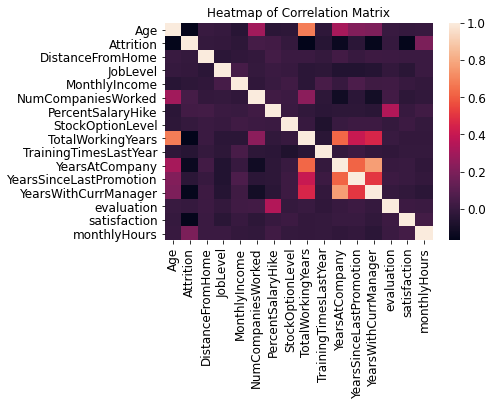

In [28]:
#Correlation Matrix
corr = df_final.corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.title('Heatmap of Correlation Matrix')
corr

## Distribution Plots (Satisfaction - Evaluation - AverageMonthlyHours)
***
**Résumé:** Examinons quelques features concernant les employés:
- **Satisfaction:** On remarque que la 

Text(0, 0.5, 'Employee Count')

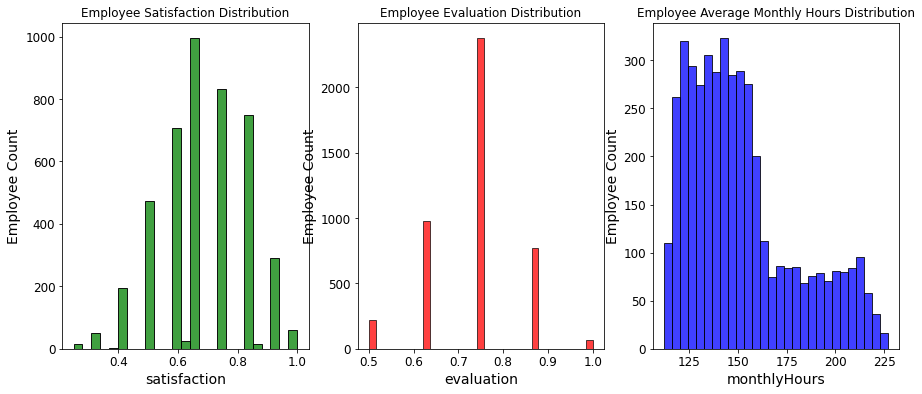

In [29]:
# Set up the matplotlib figure
f, axes = plt.subplots(ncols=3, figsize=(15, 6))

# Graph Employee Satisfaction
sns.histplot(df_final.satisfaction, kde=False, color="g", ax=axes[0]).set_title('Employee Satisfaction Distribution')
axes[0].set_ylabel('Employee Count')

# Graph Employee Evaluation
sns.histplot(df_final.evaluation, kde=False, color="r", ax=axes[1]).set_title('Employee Evaluation Distribution')
axes[1].set_ylabel('Employee Count')

# Graph Employee Average Monthly Hours
sns.histplot(df_final.monthlyHours, kde=False, color="b", ax=axes[2]).set_title('Employee Average Monthly Hours Distribution')
axes[2].set_ylabel('Employee Count')

## JobLevel vs Turn-over
***
**Résumé:** On remarque un comportement récurrent :
- La majorité des employés qui ont quitté l'entreprise ont des postes moins important (1 ou 2)
- Le poste qui comporte le plus grand nombre d'employé ayant quitté l'entreprise est le poste "2"

**Questions:**
- Pourquoi les employés dont le poste est 1 et 2 ont une tendance à quitter l'entreprise (pas de promotion?) ?
- Pourquoi les employés dont le poste est assez important (4 et 5) quittent eux aussi l'entreprise?

Text(0.5, 1.0, 'Employee JobLevel Turnover Distribution')

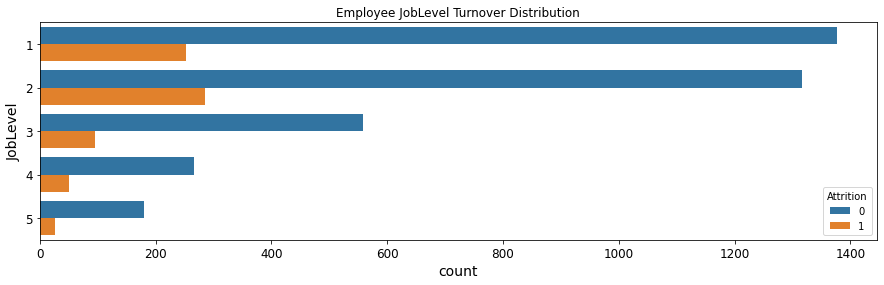

In [30]:
f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y="JobLevel", hue='Attrition', data=df_final).set_title('Employee JobLevel Turnover Distribution')

## Salary vs Turn-over
***
**Résumé:** 

Text(0.5, 1.0, 'Employee MonthlyIncome Distribution - Turnover V.S. No Turnover')

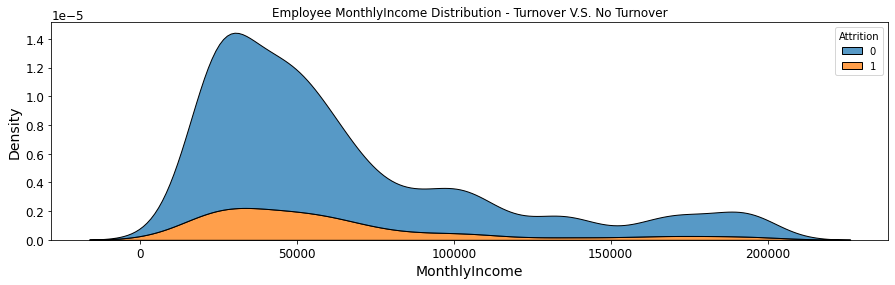

In [31]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
sns.kdeplot(data=df_final, x="MonthlyIncome", hue="Attrition", multiple="stack")
plt.title('Employee MonthlyIncome Distribution - Turnover V.S. No Turnover')

## SalaryHike vs Turnover
***

Text(0.5, 1.0, 'Employee PercentSalaryHike Distribution - Turnover V.S. No Turnover')

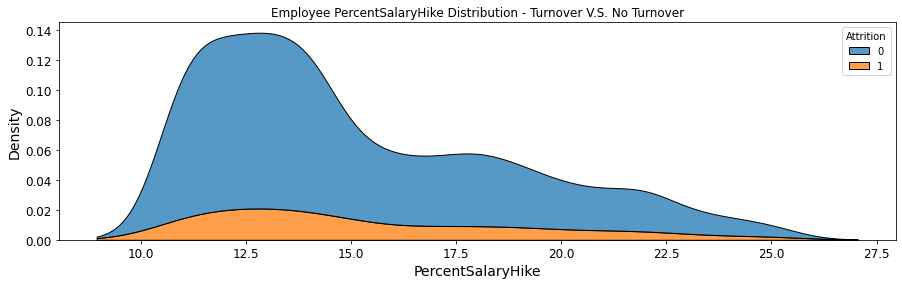

In [32]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
sns.kdeplot(data=df_final, x="PercentSalaryHike", hue="Attrition", multiple="stack")
plt.title('Employee PercentSalaryHike Distribution - Turnover V.S. No Turnover')

Text(0.5, 1.0, 'Year with manager Distribution - Turnover V.S. No Turnover')

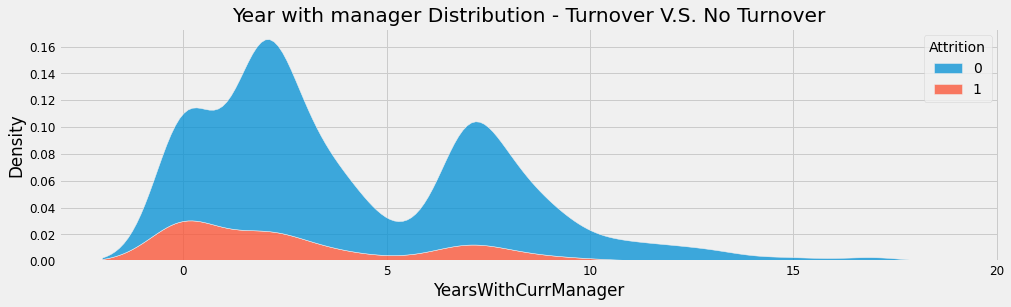

In [54]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
sns.kdeplot(data=df_final, x="YearsWithCurrManager", hue="Attrition", multiple="stack")
plt.title('Year with manager Distribution - Turnover V.S. No Turnover')

## Salary vs Salary Hike 
***

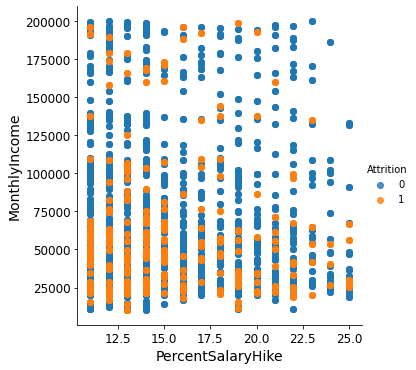

In [33]:
sns.lmplot(x='PercentSalaryHike', y='MonthlyIncome', data=df_final,
           fit_reg=False, # No regression line
           hue='Attrition')   # Color by evolution stage

## MonthlyHours vs YearsWithCurrentManager
***

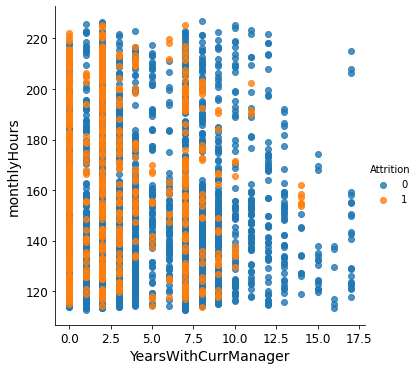

In [34]:
sns.lmplot(x='YearsWithCurrManager', y='monthlyHours', data=df_final,
           fit_reg=False, # No regression line
           hue='Attrition')   # Color by evolution stage

## Department vs Turn-over

In [35]:
final = pd.crosstab(df_final['Department'], df_final['Attrition'],rownames=['Department'], colnames=['Attrition'])

## K-Means Clustering of Employee Turnover

***

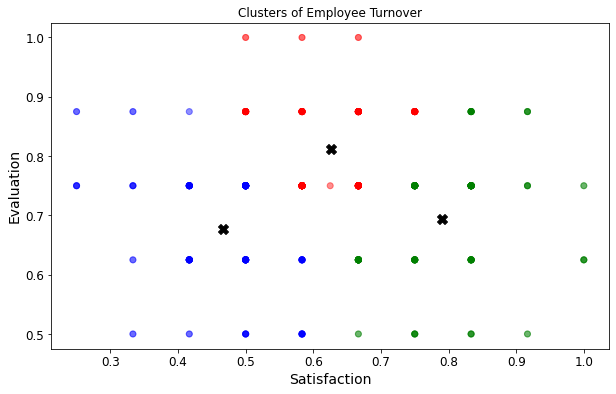

In [36]:
# Import KMeans Model
from sklearn.cluster import KMeans

# Graph and create 3 clusters of Employee Turnover
kmeans = KMeans(n_clusters=3,random_state=2)
kmeans.fit(df_final[df_final.Attrition==1][["satisfaction","evaluation"]])

kmeans_colors = ['green' if c == 0 else 'blue' if c == 2 else 'red' for c in kmeans.labels_]

fig = plt.figure(figsize=(10, 6))
plt.scatter(x="satisfaction",y="evaluation", data=df_final[df_final.Attrition==1],
            alpha=0.25,color = kmeans_colors)
plt.xlabel("Satisfaction")
plt.ylabel("Evaluation")
plt.scatter(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],color="black",marker="X",s=100)
plt.title("Clusters of Employee Turnover")
plt.show()

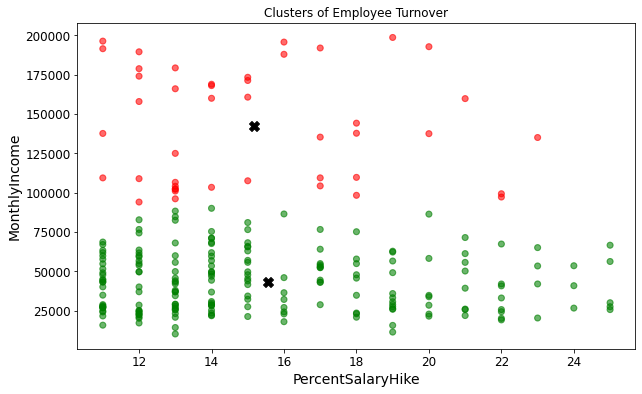

In [37]:
# Import KMeans Model
from sklearn.cluster import KMeans

# Graph and create 3 clusters of Employee Turnover
kmeans = KMeans(n_clusters=2,random_state=2)
kmeans.fit(df_final[df_final.Attrition==1][["PercentSalaryHike","MonthlyIncome"]])

kmeans_colors = ['green' if c == 0 else 'blue' if c == 2 else 'red' for c in kmeans.labels_]

fig = plt.figure(figsize=(10, 6))
plt.scatter(x="PercentSalaryHike",y="MonthlyIncome", data=df_final[df_final.Attrition==1],
            alpha=0.25,color = kmeans_colors)
plt.xlabel("PercentSalaryHike")
plt.ylabel("MonthlyIncome")
plt.scatter(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],color="black",marker="X",s=100)
plt.title("Clusters of Employee Turnover")
plt.show()

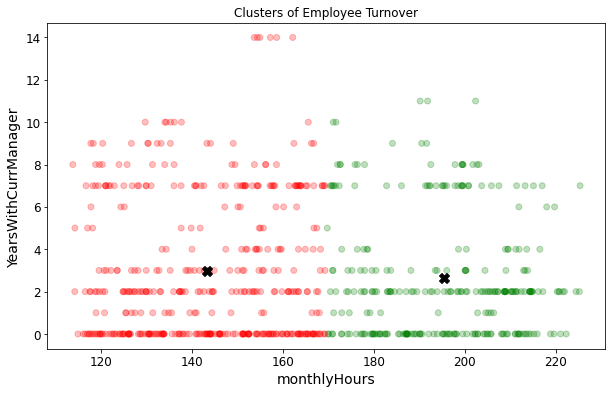

In [38]:
# Import KMeans Model
from sklearn.cluster import KMeans

# Graph and create 3 clusters of Employee Turnover
kmeans = KMeans(n_clusters=2,random_state=2)
kmeans.fit(df_final[df_final.Attrition==1][["monthlyHours","YearsWithCurrManager"]])

kmeans_colors = ['green' if c == 0 else 'blue' if c == 2 else 'red' for c in kmeans.labels_]

fig = plt.figure(figsize=(10, 6))
plt.scatter(x="monthlyHours",y="YearsWithCurrManager", data=df_final[df_final.Attrition==1],
            alpha=0.25,color = kmeans_colors)
plt.xlabel("monthlyHours")
plt.ylabel("YearsWithCurrManager")
plt.scatter(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],color="black",marker="X",s=100)
plt.title("Clusters of Employee Turnover")
plt.show()

# Partie 4 : Modeling the Data
***

xxxx







xxx

 **Note: Different Ways to Evaluate Classification Models**
 ***
   1.  **Predictive Accuracy:** How many does it get right?
   2. **Speed:** How fast does it take for the model to deploy? 
   3. **Scalability:** Can the model handle large datasets?
   4. **Robustness:** How well does the model handle outliers/missing values?
   5. **Interpretability:** Is the model easy to understand?

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve
from sklearn.preprocessing import RobustScaler

# Create dummy variables for the 'BusinessTravel','JobRole', 'EducationField' and 'Department' features, since they are categorical 
JobRole = pd.get_dummies(data=df_final['JobRole'],drop_first=True,prefix='job')
Department = pd.get_dummies(data=df_final['Department'],drop_first=True,prefix='dep')
df_final.drop(['Department','JobRole'],axis=1,inplace=True)
df_final = pd.concat([df_final,Department],axis=1)
df_final

,Age,Attrition,DistanceFromHome,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,evaluation,satisfaction,monthlyHours,dep_Research & Development,dep_Sales
0,51,0,6,1,131160,1.0,11,0,1.000000,6,1,0,0,0.750,0.750000,142.557245,0,1
1,31,1,10,1,41890,0.0,23,1,6.000000,3,5,1,4,0.750,0.750000,151.806389,1,0
2,32,0,17,4,193280,1.0,15,3,5.000000,2,5,0,3,0.750,0.416667,141.433681,1,0
3,38,0,2,3,83210,3.0,11,3,13.000000,5,8,7,5,0.625,0.916667,140.876204,1,0
4,32,0,10,1,23420,4.0,12,2,9.000000,2,6,0,4,0.750,0.666667,163.459398,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,0,5,1,60290,3.0,17,1,10.000000,5,3,0,2,0.750,0.666667,172.576111,1,0
4406,29,0,2,1,26790,2.0,15,0,10.000000,2,3,0,2,0.625,0.916667,122.366829,1,0
4407,25,0,25,2,37020,0.0,20,0,5.000000,4,4,1,2,0.875,0.583333,148.352662,1,0
4408,42,0,18,1,23980,0.0,14,1,10.000000,2,9,7,8,0.625,0.666667,190.642940,0,1


In [40]:
# Create base rate model
def base_rate_model(X) :
    y = np.zeros(X.shape[0])
    return y

In [41]:
# Create train and test splits
target_name = 'Attrition'
X = df_final.drop('Attrition', axis=1)
robust_scaler = RobustScaler()
X = robust_scaler.fit_transform(X)
y=df_final[target_name]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=123, stratify=y)

In [42]:
# Check accuracy of base rate model
y_base_rate = base_rate_model(X_test)
from sklearn.metrics import accuracy_score
print ("Base rate accuracy is %2.2f" % accuracy_score(y_test, y_base_rate))

Base rate accuracy is 0.84


In [43]:
# Check accuracy of Logistic Model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l2', C=1)

model.fit(X_train, y_train)
print ("Logistic accuracy is %2.2f" % accuracy_score(y_test, model.predict(X_test)))

Logistic accuracy is 0.86


In [44]:
# Using 10 fold Cross-Validation to train our Logistic Regression Model
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
kfold = model_selection.KFold(n_splits=10, random_state=7,shuffle=True)
modelCV = LogisticRegression(class_weight = "balanced")
scoring = 'roc_auc'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))

AUC: 0.770 (0.019)


## Logistic Regression V.S. Random Forest V.S. Decision Tree V.S. AdaBoost Model
***

In [75]:
# Compare the Logistic Regression Model V.S. Base Rate Model V.S. Random Forest Model
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier


print ("---Base Model---")
base_roc_auc = roc_auc_score(y_test, base_rate_model(X_test))
print ("Base Rate AUC = %2.2f" % base_roc_auc)
print(classification_report(y_test, base_rate_model(X_test)))

# NOTE: By adding in "class_weight = balanced", the Logistic Auc increased by about 10%! This adjusts the threshold value
logis = LogisticRegression(class_weight = "balanced")
logis.fit(X_train, y_train)
print ("\n\n ---Logistic Model---")
logit_roc_auc = roc_auc_score(y_test, logis.predict(X_test))
print ("Logistic AUC = %2.2f" % logit_roc_auc)
print(classification_report(y_test, logis.predict(X_test)))

# Decision Tree Model
dtree = tree.DecisionTreeClassifier(
    #max_depth=3,
    class_weight="balanced",
    min_weight_fraction_leaf=0.01
    )
dtree = dtree.fit(X_train,y_train)
print ("\n\n ---Decision Tree Model---")
dt_roc_auc = roc_auc_score(y_test, dtree.predict(X_test))
print ("Decision Tree AUC = %2.2f" % dt_roc_auc)
print(classification_report(y_test, dtree.predict(X_test)))

# Random Forest Model
rf = RandomForestClassifier(
    n_estimators=1000, 
    max_depth=None, 
    min_samples_split=10, 
    class_weight="balanced"
    #min_weight_fraction_leaf=0.02 
    )
rf.fit(X_train, y_train)
print ("\n\n ---Random Forest Model---")
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
print ("Random Forest AUC = %2.2f" % rf_roc_auc)
print(classification_report(y_test, rf.predict(X_test)))


# Ada Boost
ada = AdaBoostClassifier(n_estimators=400, learning_rate=0.1)
ada.fit(X_train,y_train)
print ("\n\n ---AdaBoost Model---")
ada_roc_auc = roc_auc_score(y_test, ada.predict(X_test))
print ("AdaBoost AUC = %2.2f" % ada_roc_auc)
print(classification_report(y_test, ada.predict(X_test)))

---Base Model---
Base Rate AUC = 0.50
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       740
           1       0.00      0.00      0.00       142

    accuracy                           0.84       882
   macro avg       0.42      0.50      0.46       882
weighted avg       0.70      0.84      0.77       882



 ---Logistic Model---
Logistic AUC = 0.73
              precision    recall  f1-score   support

           0       0.94      0.72      0.81       740
           1       0.34      0.75      0.47       142

    accuracy                           0.72       882
   macro avg       0.64      0.73      0.64       882
weighted avg       0.84      0.72      0.76       882



 ---Decision Tree Model---
Decision Tree AUC = 0.77
              precision    recall  f1-score   support

           0       0.94      0.80      0.86       740
           1       0.42      0.74      0.53       142

    accuracy                           0.79   

c:\windows\system32\opencv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\windows\system32\opencv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\windows\system32\opencv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




 ---Random Forest Model---
Random Forest AUC = 0.97
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       740
           1       0.98      0.94      0.96       142

    accuracy                           0.99       882
   macro avg       0.98      0.97      0.97       882
weighted avg       0.99      0.99      0.99       882



 ---AdaBoost Model---
AdaBoost AUC = 0.62
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       740
           1       0.82      0.26      0.40       142

    accuracy                           0.87       882
   macro avg       0.85      0.62      0.66       882
weighted avg       0.87      0.87      0.84       882



## ROC GRAPH

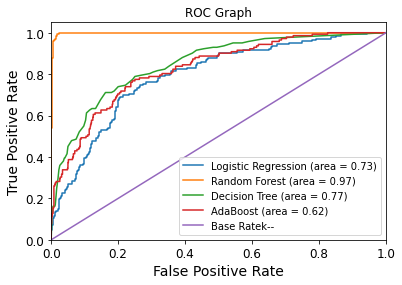

In [46]:
# Create ROC Graph
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, logis.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test, dtree.predict_proba(X_test)[:,1])
ada_fpr, ada_tpr, ada_thresholds = roc_curve(y_test, ada.predict_proba(X_test)[:,1])

plt.figure()

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)

# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)

# Plot Decision Tree ROC
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (area = %0.2f)' % dt_roc_auc)

# Plot AdaBoost ROC
plt.plot(ada_fpr, ada_tpr, label='AdaBoost (area = %0.2f)' % ada_roc_auc)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

## Matrice de confusion

In [100]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,  rf.predict(X_test))

array([[737,   3],
       [  9, 133]], dtype=int64)

## Features importance by Random Forest
***

In [80]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         4410 non-null   int64  
 1   Attrition                   4410 non-null   int64  
 2   DistanceFromHome            4410 non-null   int64  
 3   JobLevel                    4410 non-null   int64  
 4   MonthlyIncome               4410 non-null   int64  
 5   NumCompaniesWorked          4410 non-null   float64
 6   PercentSalaryHike           4410 non-null   int64  
 7   StockOptionLevel            4410 non-null   int64  
 8   TotalWorkingYears           4410 non-null   float64
 9   TrainingTimesLastYear       4410 non-null   int64  
 10  YearsAtCompany              4410 non-null   int64  
 11  YearsSinceLastPromotion     4410 non-null   int64  
 12  YearsWithCurrManager        4410 non-null   int64  
 13  evaluation                  4410 

In [79]:
rf.feature_importances_

array([0.10945278, 0.06427074, 0.02834539, 0.09138022, 0.05062944,
       0.0571518 , 0.02559679, 0.08665606, 0.03830384, 0.07449774,
       0.03693053, 0.05742518, 0.02714851, 0.08022584, 0.15078938,
       0.01065365, 0.01054212])

In [99]:
importance_featur = rf.feature_importances_
importance_featur
list_importante_feat = importance_featur.tolist()
display(list_importante_feat)
#combine list name and list values 
dict_feature_importance = dict(zip(list(df_final.drop(['Attrition'],axis=1)), list_importante_feat)) 
#Sort the dict
dict_feature_importance = dict(sorted(dict_feature_importance.items(), key=lambda item: item[1], reverse=True))
dict_feature_importance

[0.10945277651899506,
 0.0642707448639786,
 0.028345386223900856,
 0.09138022340760245,
 0.05062944033767406,
 0.05715180308436096,
 0.025596786286675652,
 0.08665605821214141,
 0.03830384187520682,
 0.07449773848793044,
 0.03693052996406831,
 0.05742517701856856,
 0.027148507606478876,
 0.08022584203533056,
 0.15078937938920156,
 0.01065364964569785,
 0.010542115042187966]

{'monthlyHours': 0.15078937938920156,
 'Age': 0.10945277651899506,
 'MonthlyIncome': 0.09138022340760245,
 'TotalWorkingYears': 0.08665605821214141,
 'satisfaction': 0.08022584203533056,
 'YearsAtCompany': 0.07449773848793044,
 'DistanceFromHome': 0.0642707448639786,
 'YearsWithCurrManager': 0.05742517701856856,
 'PercentSalaryHike': 0.05715180308436096,
 'NumCompaniesWorked': 0.05062944033767406,
 'TrainingTimesLastYear': 0.03830384187520682,
 'YearsSinceLastPromotion': 0.03693052996406831,
 'JobLevel': 0.028345386223900856,
 'evaluation': 0.027148507606478876,
 'StockOptionLevel': 0.025596786286675652,
 'dep_Research & Development': 0.01065364964569785,
 'dep_Sales': 0.010542115042187966}

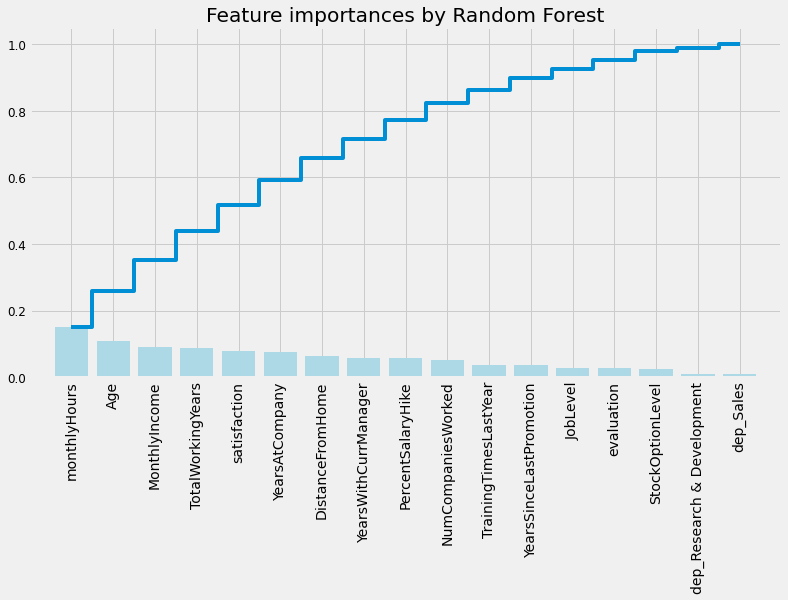

In [97]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12,6)

## plot the importances ##
importances = rf.feature_importances_
feat_names = df_final.drop(['Attrition'],axis=1).columns


indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature importances by Random Forest")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

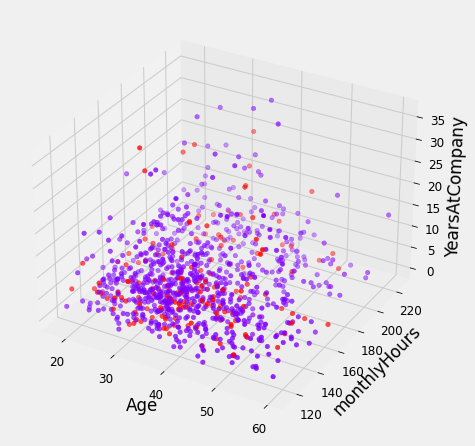

In [51]:
from mpl_toolkits.mplot3d import Axes3D
import random

fig = plt.figure()
ax = Axes3D(fig)

sequence_containing_x_vals = list(df_final["Age"][:1000])
sequence_containing_y_vals = list(df_final["monthlyHours"][:1000])
sequence_containing_z_vals = list(df_final["YearsAtCompany"][:1000])

random.shuffle(sequence_containing_x_vals)
random.shuffle(sequence_containing_y_vals)
random.shuffle(sequence_containing_z_vals)
ax.set_xlabel('Age')
ax.set_ylabel('monthlyHours')
ax.set_zlabel('YearsAtCompany')
ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals,
           sequence_containing_z_vals, c=list(df_final["Attrition"][:1000]), cmap='rainbow')
plt.show()

In [78]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
        'max_depth': randint(low=1, high=50),
    }
#CODE A COMPLETER
forest_reg = RandomForestClassifier()
#CODE A COMPLETER
clf = RandomizedSearchCV(forest_reg, param_distribs, random_state=42, cv=10)

search = clf.fit(X_train, y_train)
search.best_estimator_

RandomForestClassifier(max_depth=21, max_features=1, n_estimators=58)

# Partie 5 : Interprétation 
***

Random Forest est le meilleur classfieur pour prédire l'attrition des employés pour notre jeu de données. Certains des facteurs les plus importants dont dépend l'attrition des employés sont les suivants:
- MonthlyHours 
- Satisfaction
- YearsAtCompany
- Age
- MonthyIncome

# Vision économique du projet
***

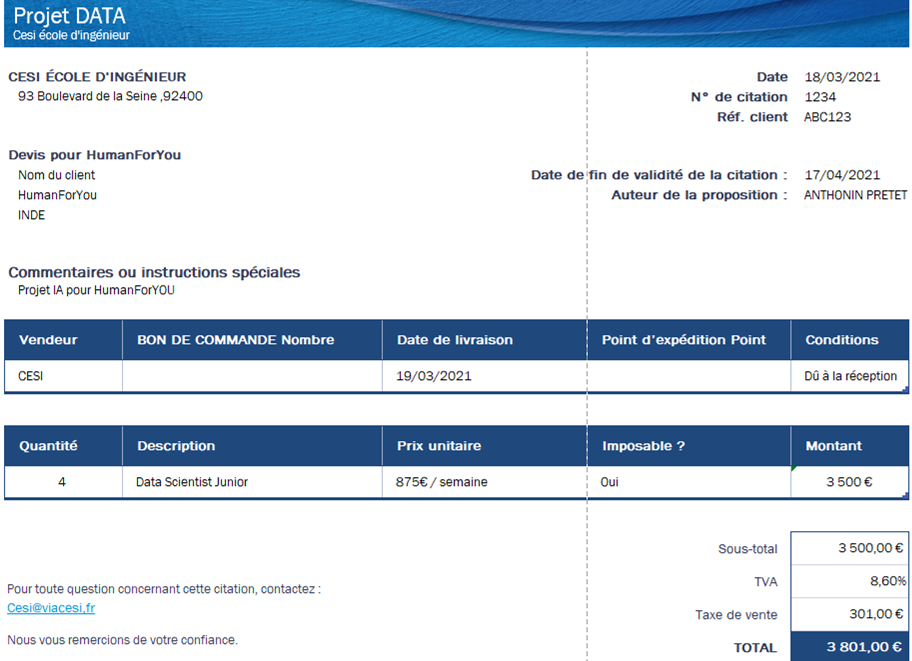